In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from joblib import dump


In [7]:
df_dict = pd.read_csv('/Users/preethapallavi/Documents/EPITA S2/AI project methodologies/ai-project-methodology/data/Dataset/ECommerce_Data_Dict.csv')
df_dict.head(21)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,E Comm,CustomerID,Unique customer ID
2,NaN,E Comm,Churn,Churn Flag
3,NaN,E Comm,Tenure,Tenure of customer in organization
4,NaN,E Comm,PreferredLoginDevice,Preferred login device of customer
5,NaN,E Comm,CityTier,City tier
6,NaN,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
7,NaN,E Comm,PreferredPaymentMode,Preferred payment method of customer
8,NaN,E Comm,Gender,Gender of customer
9,NaN,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...


In [8]:
df = pd.read_csv('/Users/preethapallavi/Documents/EPITA S2/AI project methodologies/ai-project-methodology/data/dataset/ECommerce.csv')
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [9]:
df_copy = df

In [10]:
print(df.info())
print('Data shape: %d rows and %d cols.' % df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [11]:
del df['CustomerID']
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [12]:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [13]:
total_missing_values = df.isnull().sum().sum()
print(f'total missing values in the datset: {total_missing_values} ({round((total_missing_values/df.shape[0])*100, 2)}%)')

total missing values in the datset: 1856 (32.97%)


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.0,0.0,0.0,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.0,1.0,3.0,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.0,4.0,4.0,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.0,3.0,4.0,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.0,3.0,6.0,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.0,0.0,1.0,1.0
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.0,15.0,18.0,26.0


In [15]:
for col in df.columns:   #FOR HANDLING MISSING VALUES. WE USED MEDIAN OF THAT COLUMN.
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

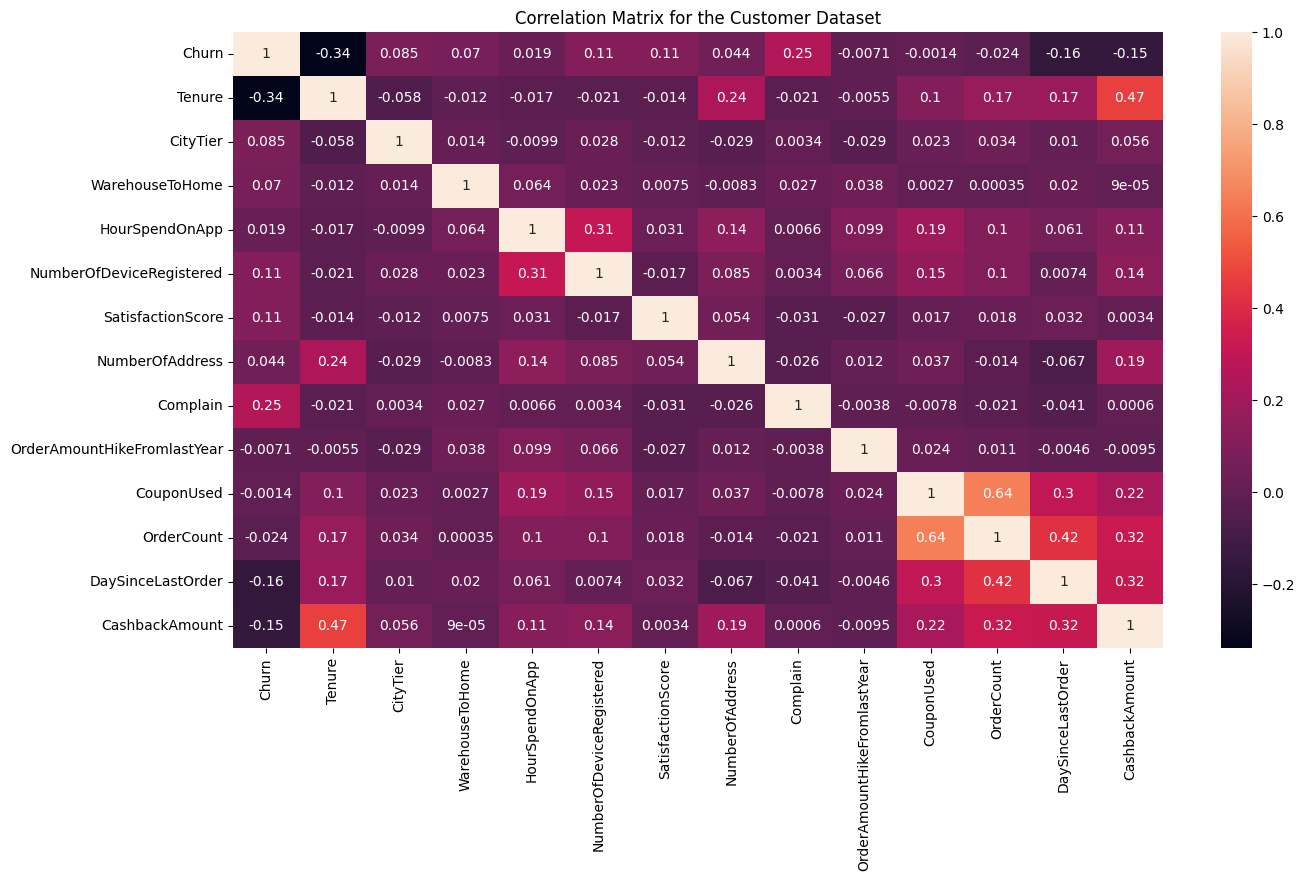

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

### DATA PREPARATION


label encoding on the categorical and then scaling the numerical features


In [17]:
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
numerical_columns = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']


In [18]:

# 1. Split DataFrame into Categorical and Numerical DataFrames
categorical_df = df[categorical_columns]
numerical_df = df[numerical_columns]

# 2. Encode Categorical Columns
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
encoded_categorical = one_hot_encoder.fit_transform(categorical_df)

# 3. Concatenate Encoded and Numerical DataFrames
encoded_categorical_df = pd.DataFrame(encoded_categorical.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_columns))
preprocessed_df = pd.concat([encoded_categorical_df, numerical_df], axis=1)

# Define the path where you want to save the encoder
encoder_path = "../models/encoder.joblib"

# Save the encoder
dump(one_hot_encoder, encoder_path)



['../models/encoder.joblib']

In [19]:
X = preprocessed_df.drop(columns='Churn')
y = preprocessed_df['Churn']

In [20]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=30)


### Model Training

In [21]:
log_reg = LogisticRegression(solver='lbfgs',  max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
model_path = "../models/model.joblib"
dump(log_reg, model_path)

['../models/model.joblib']

In [23]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of our model is:", accuracy)
print(classification_report(y_test, y_pred))

The accuracy of our model is: 0.8839550029603316
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1379
           1       0.75      0.55      0.64       310

    accuracy                           0.88      1689
   macro avg       0.83      0.76      0.78      1689
weighted avg       0.88      0.88      0.88      1689



In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump, load

def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
    numerical_columns = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 
                         'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 
                         'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']

    # Handle missing values by filling them with the median of each column
    for col in data.columns:
        if data[col].isnull().sum() > 0:
            data[col] = data[col].fillna(data[col].median())

    # Split DataFrame into Categorical and Numerical DataFrames
    categorical_df = data[categorical_columns]
    numerical_df = data[numerical_columns]

    # Encode Categorical Columns
    one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
    encoded_categorical = one_hot_encoder.fit_transform(categorical_df)

    # Concatenate Encoded and Numerical DataFrames
    encoded_categorical_df = pd.DataFrame(encoded_categorical.toarray(), 
                                           columns=one_hot_encoder.get_feature_names_out(categorical_columns))
    preprocessed_df = pd.concat([encoded_categorical_df, numerical_df], axis=1)

    return preprocessed_df

def build_model(data: pd.DataFrame) -> dict:
    X = data.drop(columns='Churn')
    y = data['Churn']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

    log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
    log_reg.fit(X_train, y_train)

    # Save the model
    model_path = "../models/model.joblib"
    dump(log_reg, model_path)

    # Evaluate the model
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    return {'accuracy': accuracy, 'classification_report': report}

def make_predictions(input_data: pd.DataFrame) -> np.ndarray:
    # Load the encoder and the model
    encoder_path = "../models/encoder.joblib"
    model_path = "../models/model.joblib"

    encoder = load(encoder_path)
    model = load(model_path)

    # Preprocess the input data
    preprocessed_input = preprocess(input_data)

    # Make predictions
    predictions = model.predict(preprocessed_input.drop(columns='Churn'))

    return predictions


In [27]:
# Preprocess data
preprocessed_data = preprocess(df)

# Train the model and evaluate its performance
model_performance = build_model(preprocessed_data)
print("Model Performance:", model_performance)

# Make predictions using new input data
new_data = pd.read_csv('/Users/preethapallavi/Documents/EPITA S2/AI project methodologies/ai-project-methodology/data/dataset/ECommerce.csv')
predictions = make_predictions(new_data)
print("Predictions:", predictions)


Model Performance: {'accuracy': 0.8839550029603316, 'classification_report': {'0': {'precision': 0.9048596851471595, 'recall': 0.9586656997824511, 'f1-score': 0.9309859154929578, 'support': 1379.0}, '1': {'precision': 0.75, 'recall': 0.5516129032258065, 'f1-score': 0.6356877323420074, 'support': 310.0}, 'accuracy': 0.8839550029603316, 'macro avg': {'precision': 0.8274298425735798, 'recall': 0.7551393015041288, 'f1-score': 0.7833368239174826, 'support': 1689.0}, 'weighted avg': {'precision': 0.8764366523492795, 'recall': 0.8839550029603316, 'f1-score': 0.8767867226114926, 'support': 1689.0}}}
Predictions: [0 1 1 ... 0 0 0]
